In [1]:
#Importing necessary modules
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import f_classif
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/diadi/datasets/heart.csv', sep=',', header=0)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.shape

(303, 14)

[Text(0.5, 0, 'Probability of heart attack'),
 Text(0.5, 1.0, 'Distribution of outputs'),
 Text(0, 0.5, ' ')]

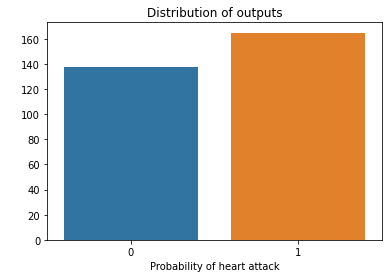

In [7]:
sns.countplot(x="output", data=df).set(xlabel='Probability of heart attack',
                                       title='Distribution of outputs',ylabel=' ')

In [8]:
name=['typical_angina','atypical_angina','non_anginal_pain','asymptomatic']
cd=pd.get_dummies(df['cp'])
cd.columns=name
cd.head()

,typical_angina,atypical_angina,non_anginal_pain,asymptomatic
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [9]:
name=['normal',' having_abnormality','definite_left_ventricular_hypertrophy']
ad=pd.get_dummies(df['restecg'])
ad.columns=name

In [10]:
df=df.drop(labels=['cp','restecg'],axis=1)
df=pd.concat([df,cd,ad],axis=1)
df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,typical_angina,atypical_angina,non_anginal_pain,asymptomatic,normal,having_abnormality,definite_left_ventricular_hypertrophy
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0


In [11]:
skb = SelectKBest(score_func=f_classif, k=15)
skb.fit(df.drop(['output'], axis=1 ),df['output'])
select_features_kbest = skb.get_support()
features = df.drop(['output'], axis=1 ).columns[select_features_kbest]

In [12]:
features

Index(['age', 'sex', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa',
       'thall', 'typical_angina', 'atypical_angina', 'non_anginal_pain',
       'asymptomatic', 'normal', ' having_abnormality'],
      dtype='object')

In [13]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5455815815341061314
]


In [14]:
X=df[features]
y=df['output']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size = 0.15)
X_test=scaler.transform(X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)

X_train shape: (218, 15)
X_test shape: (46, 15)
X_val shape: (39, 15)


In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
history=model.fit(X_train, y_train, epochs=10, batch_size=30,validation_data=(X_val, y_val))

Epoch 1/10
8/8 [==============================] - 5s 182ms/step - loss: 0.8716 - accuracy: 0.4431 - val_loss: 0.6877 - val_accuracy: 0.4615
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.7329 - accuracy: 0.4958 - val_loss: 0.6233 - val_accuracy: 0.5897
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss: 0.6832 - accuracy: 0.5484 - val_loss: 0.5697 - val_accuracy: 0.7436
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 0.6274 - accuracy: 0.5905 - val_loss: 0.5250 - val_accuracy: 0.8462
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 0.5702 - accuracy: 0.6739 - val_loss: 0.4927 - val_accuracy: 0.8974
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.5610 - accuracy: 0.7242 - val_loss: 0.4576 - val_accuracy: 0.8718
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5314 - accuracy: 0.7741 - val_loss: 0.4286 - val_accuracy: 0.8718
Epoch 8/10
8/8 [==========

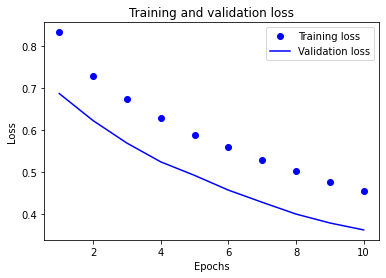

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
 model.save_weights("C:/Users/diadi/heart_attack_dnn_prediction/model.h5")
model_json = model.to_json()
with open("C:/Users/diadi/heart_attack_dnn_prediction/model.json", "w") as js:
    js.write(model_json)

In [46]:
from tensorflow.keras.models import model_from_json
json_file = open('C:/Users/diadi/heart_attack_dnn_prediction/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
keras_model = model_from_json(loaded_model_json)
keras_model.load_weights("C:/Users/diadi/heart_attack_dnn_prediction/model.h5")

In [44]:
pred = model.predict_classes(X_test)
print(pred[0:5])

[[1]
 [0]
 [0]
 [1]
 [1]]


In [49]:
pred =keras_model.predict_classes(X_test)
print(pred[0:5])

[[1]
 [0]
 [0]
 [1]
 [1]]


In [52]:
results = model.evaluate(X_test, y_test)
print(results)

2/2 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8696
[0.41379979252815247, 0.8695651888847351]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
['age', 'sex', 'trtbps', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa',
       'thall', 'typical_angina', 'atypical_angina', 'non_anginal_pain',
       'asymptomatic', 'normal', ' having_abnormality']